<a href="https://colab.research.google.com/github/jayjinnie/gbdcon/blob/main/%EA%B2%BD%EB%B6%81_%EC%9E%A0%EC%9E%AC_%EC%9A%94%EC%9D%B8_%ED%98%91%EC%97%85_%ED%95%84%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 잠재 요인 협업 필터링 (Latent Factor Collaborative Filtering)
#### 행렬 분해(Matrix Factorization)를 기반으로 잠재 요인을 추출하여 추출된 잠재 요인을 기반으로 상품을 추천함

# 필요한 데이터
#### customer_id: 회원번호
#### merc_name: 상품명
#### rating: 선호도


In [2]:
import pandas as pd

data = pd.read_excel("선호도 테이블.xlsx")
data.head()

,회원번호,상품명,선호도
0,1,무농약 연근 쓱결제용,18.680282
1,1,★이웃사촌★ [성주로컬푸드]고소애500g,20.818027
2,1,★이웃사촌★ [성주로컬푸드]고소애500g,20.818027
3,1,[오세창곤충체험농장]파워뱅이분말 180g,18.806200
4,158993,[오세창곤충체험농장]파워뱅이분말 180g,18.806200


# pivot 테이블 만들기
#### 고객-상품 선호도 데이터 pivot 테이블 생성
#### fillna로 NaN 값 채워주기

In [3]:
customer_merc_rating = data.pivot_table('선호도', index='회원번호', columns='상품명').fillna(0)
customer_merc_rating.shape

(7340, 1261)

In [4]:
customer_merc_rating.head()

상품명,"""힘내세요, 우리아빠"" 기세움[굼벵이(꽃벵이)진액/엑기스]",(경북청년농부들) 민서네버섯농장 건슬라이스표고버섯 150g,(문경약돌돼지) 문경약돌돼지 LA식 갈비(냉동) 1kg,(문경약돌돼지) 문경약돌돼지 목살(냉동) 500g*2,(밀웜)고소애 건조 100g,(밀웜)고소애 분말 100g,(울진오징어) 배오징어 반건조오징어 10마리 (100% 국산),**곶감타래과자**,100%국내산 맑은 참기름 180ml,100%국내산 맑은 참기름 300ml,100%국내산 볶지 않고 생으로 짜낸 맑은 생들기름180ml,100%국내산 볶지 않고 생으로 짜낸 맑은 생들기름300ml,100%국내산 참.들 기름세트,2+1 마누카꿀 홍삼절편 3종 택1,2020 의성깐마늘(토종) 상 1kg,2020 의성깐마늘(토종) 하 1kg,2020년 경북사과 온라인 홍보행사 부사 3kg 10-12과 / 11월 9일~13일까지 행사,2020년 유기농인증 토종가시복분자(급냉),"2020년 하지감자(중, 4,번) 10kg",2020년 햅쌀 안동밥상 백진주 10kg 백미,2020년 햅쌀 안동밥상 백진주 10kg 현미,2020년 햅쌀_9분도 쌀눈쌀 10kg,2020년 햅쌀_행복한쌀 5kg,2020년 햇 팥 1kg (적두),2020년 햇마늘 향이 진한 의성마늘 3kg,"2020년, 국산 고추가루,햇살담은 고춧가루,1kg",2020년산 햇고추/(주)다산식품 베타글루칸 영양청결고춧가루/고춧가루 1kg/햇고춧가루,"20년 속이 꽉찬 유기농 양파 (대) 3kg, 5kg, 10kg",20년 수확 알싸한 친환경 깐마늘 1kg (대),20년산 햅쌀 1kg 4kg 10kg,20년산 햇 찰보리쌀 4kg,264청포도와인 광야 미디움스위트,264청포도와인 꽃 스위트,GAP인증 청송꿀사과백석탄농원 (사과즙 120ml x 50팩 2박스),[ 농부플러스 ] 국산 냉압착 생들기름 180ml,[ 농부플러스 ] 국산 냉압착 생들기름 240ml,[ 농부플러스 ] 국산 냉압착생들기름 240ml 두병선물세트,[ 농부플러스 ] 국산 저온착유 들기름 180ml,[ 농부플러스 ] 국산 저온착유 들기름 240ml,[ 농부플러스 ] 국산 저온착유 참기름 180ml,...,푸드버킷 착즙 포도즙 100 120팩,푸드버킷 착즙 포도즙 100 30팩,푸드버킷 착즙 포도즙 100 60팩,풋사과 동결건조 파우더,풍기농부홍삼정골드600g+50g,풍기농부홍삼청프리미엄240g,프리미엄 레드 홍삼초코봉봉 24개입,피크닉사과 가정용 흠과 10kg,하니베 현미 누룽지 130g 1+1+1,한고을 한재미나리1kg (무농약),한고을 한재미나리200g (무농약),항아초 2종세트(사과300ml+솔잎300ml),항아초 마시는 식초3종세트(사과300ml+솔잎300ml+현미300ml),항아초 마시는사과초 500ml,항아초 마시는현미초 500ml,항아초 생강식초 300ml,항아초 현미식초 500ml,해방풍,해인들강정,"햇 반태양초 고춧가루 250g ,500g,1000g",햇 영양고추가루/ 생산자직판/ 직접말린태양초/ 영양군 고추/ 고춧가루5근(2.5kg)김장용보통맵기,햇 천도 복숭아즙 과일즙 80ml 1포,햇땅콩 물좋은 예천산 생땅콩 2kg,형제농장 어수리나물 1Kg,"형제농장 어수리나물 500g,1Kg",호밀그대로 스낵,혼합세트 (375mlx2개),혼합세트 (750mlx2개),홍로사과 5KG (14~16과) 선물용,홍잠 100g / 농촌진흥청 특허 기술 홍잠(익힌숙잠),홍잠분말 50g / 누에농장 생산제품,후포리 명품 홍게찜 10마리,"흥림산웰빙산나물 모둠나물,곰취,취나물 1Kg","흥림산웰빙산나물 모둠나물,곰취,취나물 1Kg(최소 구매수량 2Kg)",［거인황금팜］국내산 돼지고기 냉장 등심덧살 500g(1등급이상),［문경몰］무농약 오미자 생과,"［문경몰］문경 순오미자 1L (오미자추출액 100%, 무설탕)",［문경몰］알갱이만쏙 오미자 당절임,［문경몰］오미자 당절임,［문경몰］오미자 생과
회원번호,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,16.495395,0.0,0.0,0.0,0.0,28.082151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
60251,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.80112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.054424,0.0
60603,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
60729,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
60846,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# 특정 상품과 유사한 상품을 추천
#### 따라서 고객-상품 테이블을 상품-고객 테이블로 전치 (transpose)

In [5]:
merc_customer_rating = customer_merc_rating.values.T
merc_customer_rating.shape

(1261, 7340)

# SVD (Singular Value Decomposition) 
#### 특이값 분해를 통해 유사한 데이터, 잠재 요인 추출

In [8]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# 5개의 주요 feature를 가진 행렬로 데이터 세트 변환
SVD = TruncatedSVD(n_components=5)
matrix = SVD.fit_transform(merc_customer_rating)
matrix.shape

(1261, 5)

In [7]:
matrix[0]

array([ 1.14733638e-10,  3.92416159e-09,  4.22351187e-07, -1.12636210e-08,
       -4.31811018e-08])

#### 1261개의 상품 데이터가 5개의 어떠한 요소의 값을 가지게 됨
#### 추출된 데이터끼리의 피어슨 상관계수 구하기

In [9]:
corr = np.corrcoef(matrix)
corr.shape

(1261, 1261)

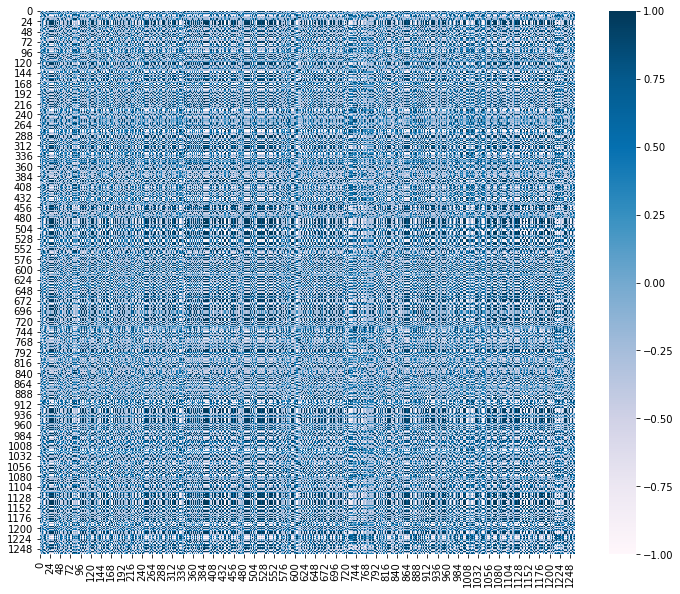

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="PuBu", annot = False)

In [11]:
# 상관계수를 이용하여 특정 상품과 상관계수가 높은 다른 상품 추출
merc_name = customer_merc_rating.columns
merc_name_list = list(merc_name)
temp_data = merc_name_list.index("피크닉사과 가정용 흠과 10kg")

In [12]:
corr_temp_data = corr[temp_data]
list(merc_name[(corr_temp_data >= 0.9)])[:50]

['[가을빛고운의성장마실] 사과고추장 500g',
 '[또바기] 녹두 1kg',
 '[웰빙미래]웰빙건어물 꼬시래기 염장꼬시래기 3kg 한박스 바다의냉면 완도꼬시래기',
 '[회룡포참기름] 예천 회룡포 참기름 300ml 두병, 볶음참깨 선물세트',
 '★이웃사촌★[봉화로컬푸드]고춧가루(고추장용) 500g',
 '바른된장 900g',
 '피크닉사과 가정용 흠과 10kg']

### 추출한 잠재 요인을 기반으로 특정 상품과 유사한 상품을 추천해주는 시스템
### 그러나 고객의 구매 이력을 고려하지 않으므로 고객에게 맞춤형으로 추천하기에는 한계가 있음